### 공공데이터 상권정보 분석

- www.data.go.kr
- 국가중점데이터인 상권정보 살펴보기
- 상가(상권)정보_의료기관_201909

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats

#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [7]:
#데이터
df= pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [10]:
#결측치
#파이썬에서 True는 1과 같다(True == 1)
#그래서 sum()함수를 이용해서 null이 있는지 확인

null_count = df.isnull().sum()
print(null_count)

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64


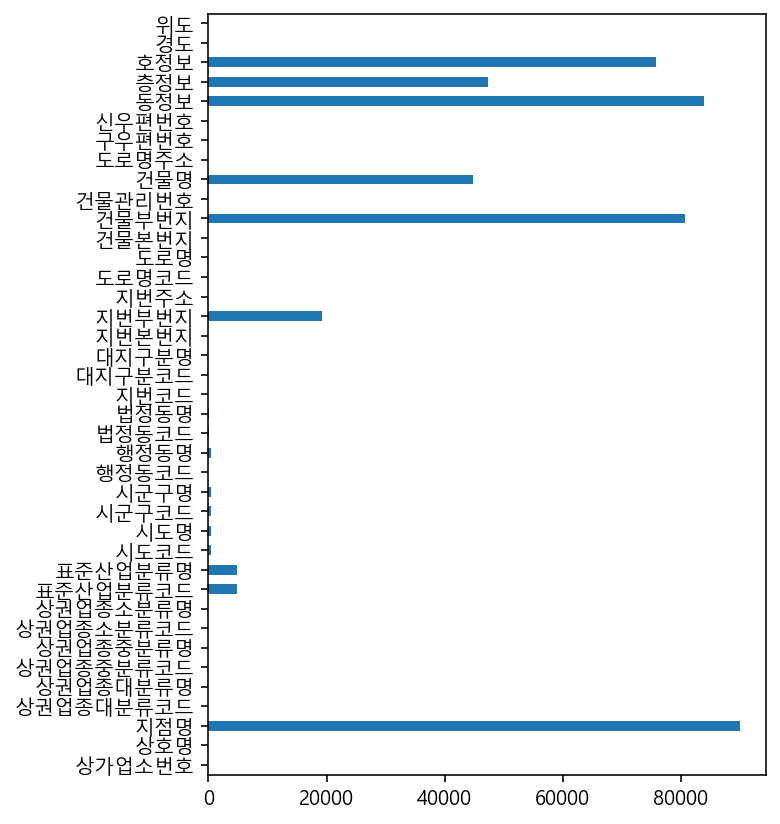

In [11]:
#위에서 구한 결측치를 plot.bar를 통해 막대그래프로 표현
null_count.plot.barh(figsize=(5,7))

In [23]:
#위에서 계산한 결측치 수를 reset_index를 통해 데이터 프레임으로 만들어준다.
df_null_count = null_count.reset_index()

#컬럼명을 변경
df_null_count.columns =['컬럼명','결측치수']

#정렬하기
#df_null_count : 데이터 프레임에 있는 결측치수 컬럼을 sort_value를 통해 
#정렬해서 결측치가 많은 순으로 상위 10개만 출력
df_null_count_top10 = df_null_count.sort_values(by='결측치수',ascending=False).head(10)

In [31]:
drop_columns=df_null_count_top10['컬럼명'].tolist()

10

In [28]:
df[drop_columns] #삭제 대상 컬럼 리스트
print(df.shape) #(91335, 39)
df = df.drop(drop_columns, axis=1) #10개 컬럼 삭제
print(df.shape) #(91335, 29)

(91335, 39)
(91335, 29)


In [44]:
#중복제거
print(df['상권업종대분류명'].unique())
print(df['상권업종대분류명'].nunique())

print('#'*80)
print(df['상권업종중분류명'].unique())
print(df['상권업종중분류명'].nunique())

print('#'*80)
print(df['상권업종소분류명'].unique())
print(df['상권업종소분류명'].nunique())

['의료']
1
################################################################################
['병원' '약국/한약방' '수의업' '유사의료업' '의료관련서비스업']
5
################################################################################
['산부인과' '내과/외과' '신경외과' '기타병원' '약국' '동물병원' '한약방' '탕제원' '정형/성형외과' '소아과'
 '이비인후과의원' '노인/치매병원' '언어치료' '수의업-종합' '한의원' '치과의원' '침구원' '일반병원' '안과의원'
 '조산원' '한방병원' '종합병원' '유사의료업기타' '응급구조대' '혈액원' '치과병원' '척추교정치료' '피부과' '비뇨기과'
 '치과기공소' '산후조리원' '접골원' '수의업-기타' '제대혈']
34


### 시각화하기

AxesSubplot(0.125,0.125;0.775x0.755)


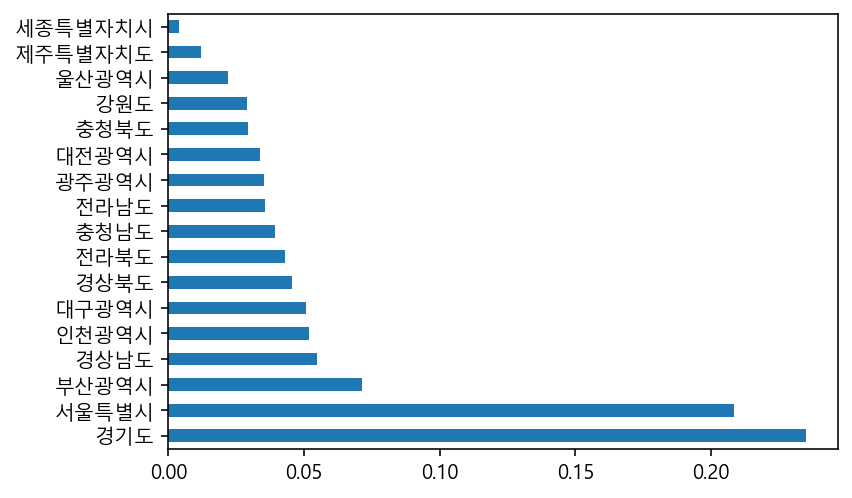

In [50]:
#시도명으로 구분하여 평균구하기
city_normalize = df['시도명'].value_counts(normalize=True)

print(city_normalize.plot.barh())

AxesSubplot(0.135,0.125;0.755x0.755)


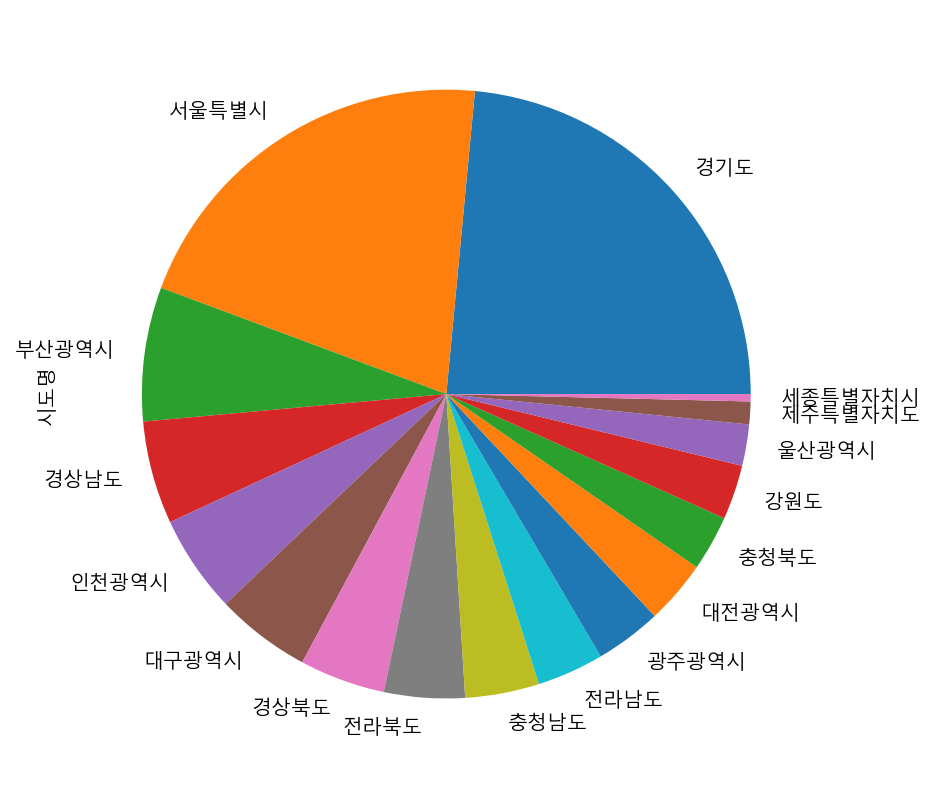

In [51]:
print(city_normalize.plot.pie(figsize=(7,7)))

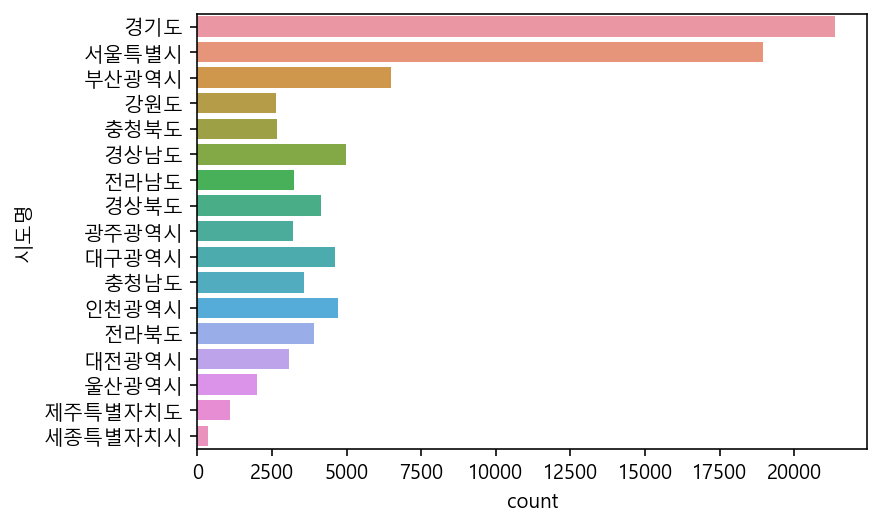

In [52]:
sns.countplot(data=df, y='시도명')

In [66]:
a=df['상권업종대분류명'].value_counts(normalize=True)
# print('#'*80)
b=df['상권업종중분류명'].value_counts()
# print('#'*80)
c=df['상권업종소분류명'].value_counts()

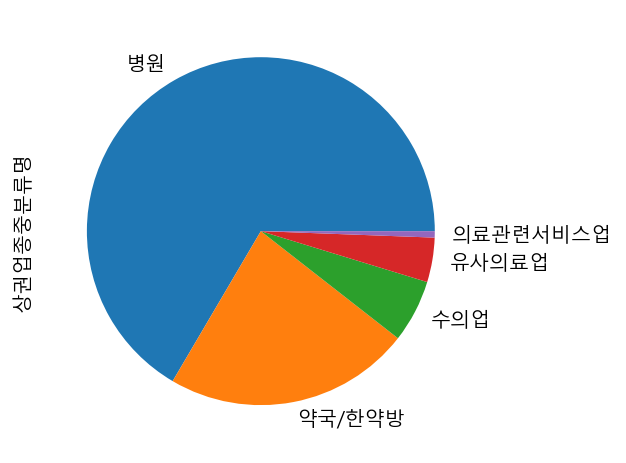

In [71]:
b.plot.pie()

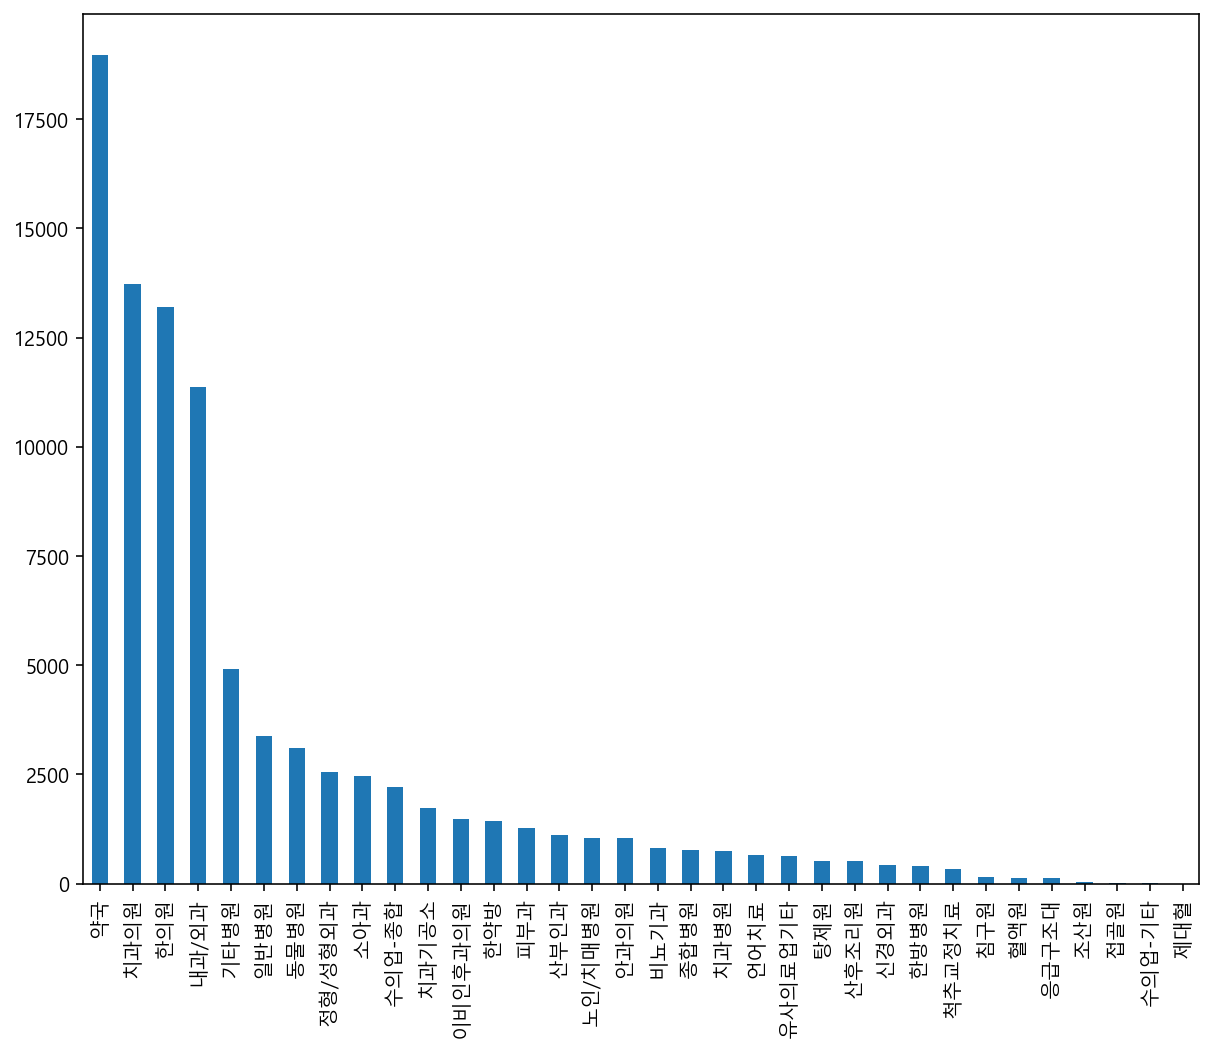

In [74]:
c.plot.bar(figsize=(10,8))

In [80]:
#특정 데이터 색인
df.loc[df['상권업종대분류명']=='의료', '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [94]:
df.loc[df['상권업종대분류명'] =='의료', '상권업종중분류명'].unique().tolist()

['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업']

In [95]:
df_medi = df[df['상권업종중분류명'] =='유사의료업']

In [100]:
#'약국'이면서, '서울특별시'에 있는 것
df_seoul_drug = df[(df['상권업종소분류명']=='약국') &(df['시도명'] =='서울특별시')]

#시군구명으로 평균구하기
a = df_seoul_drug['시군구명'].value_counts(normalize=True)

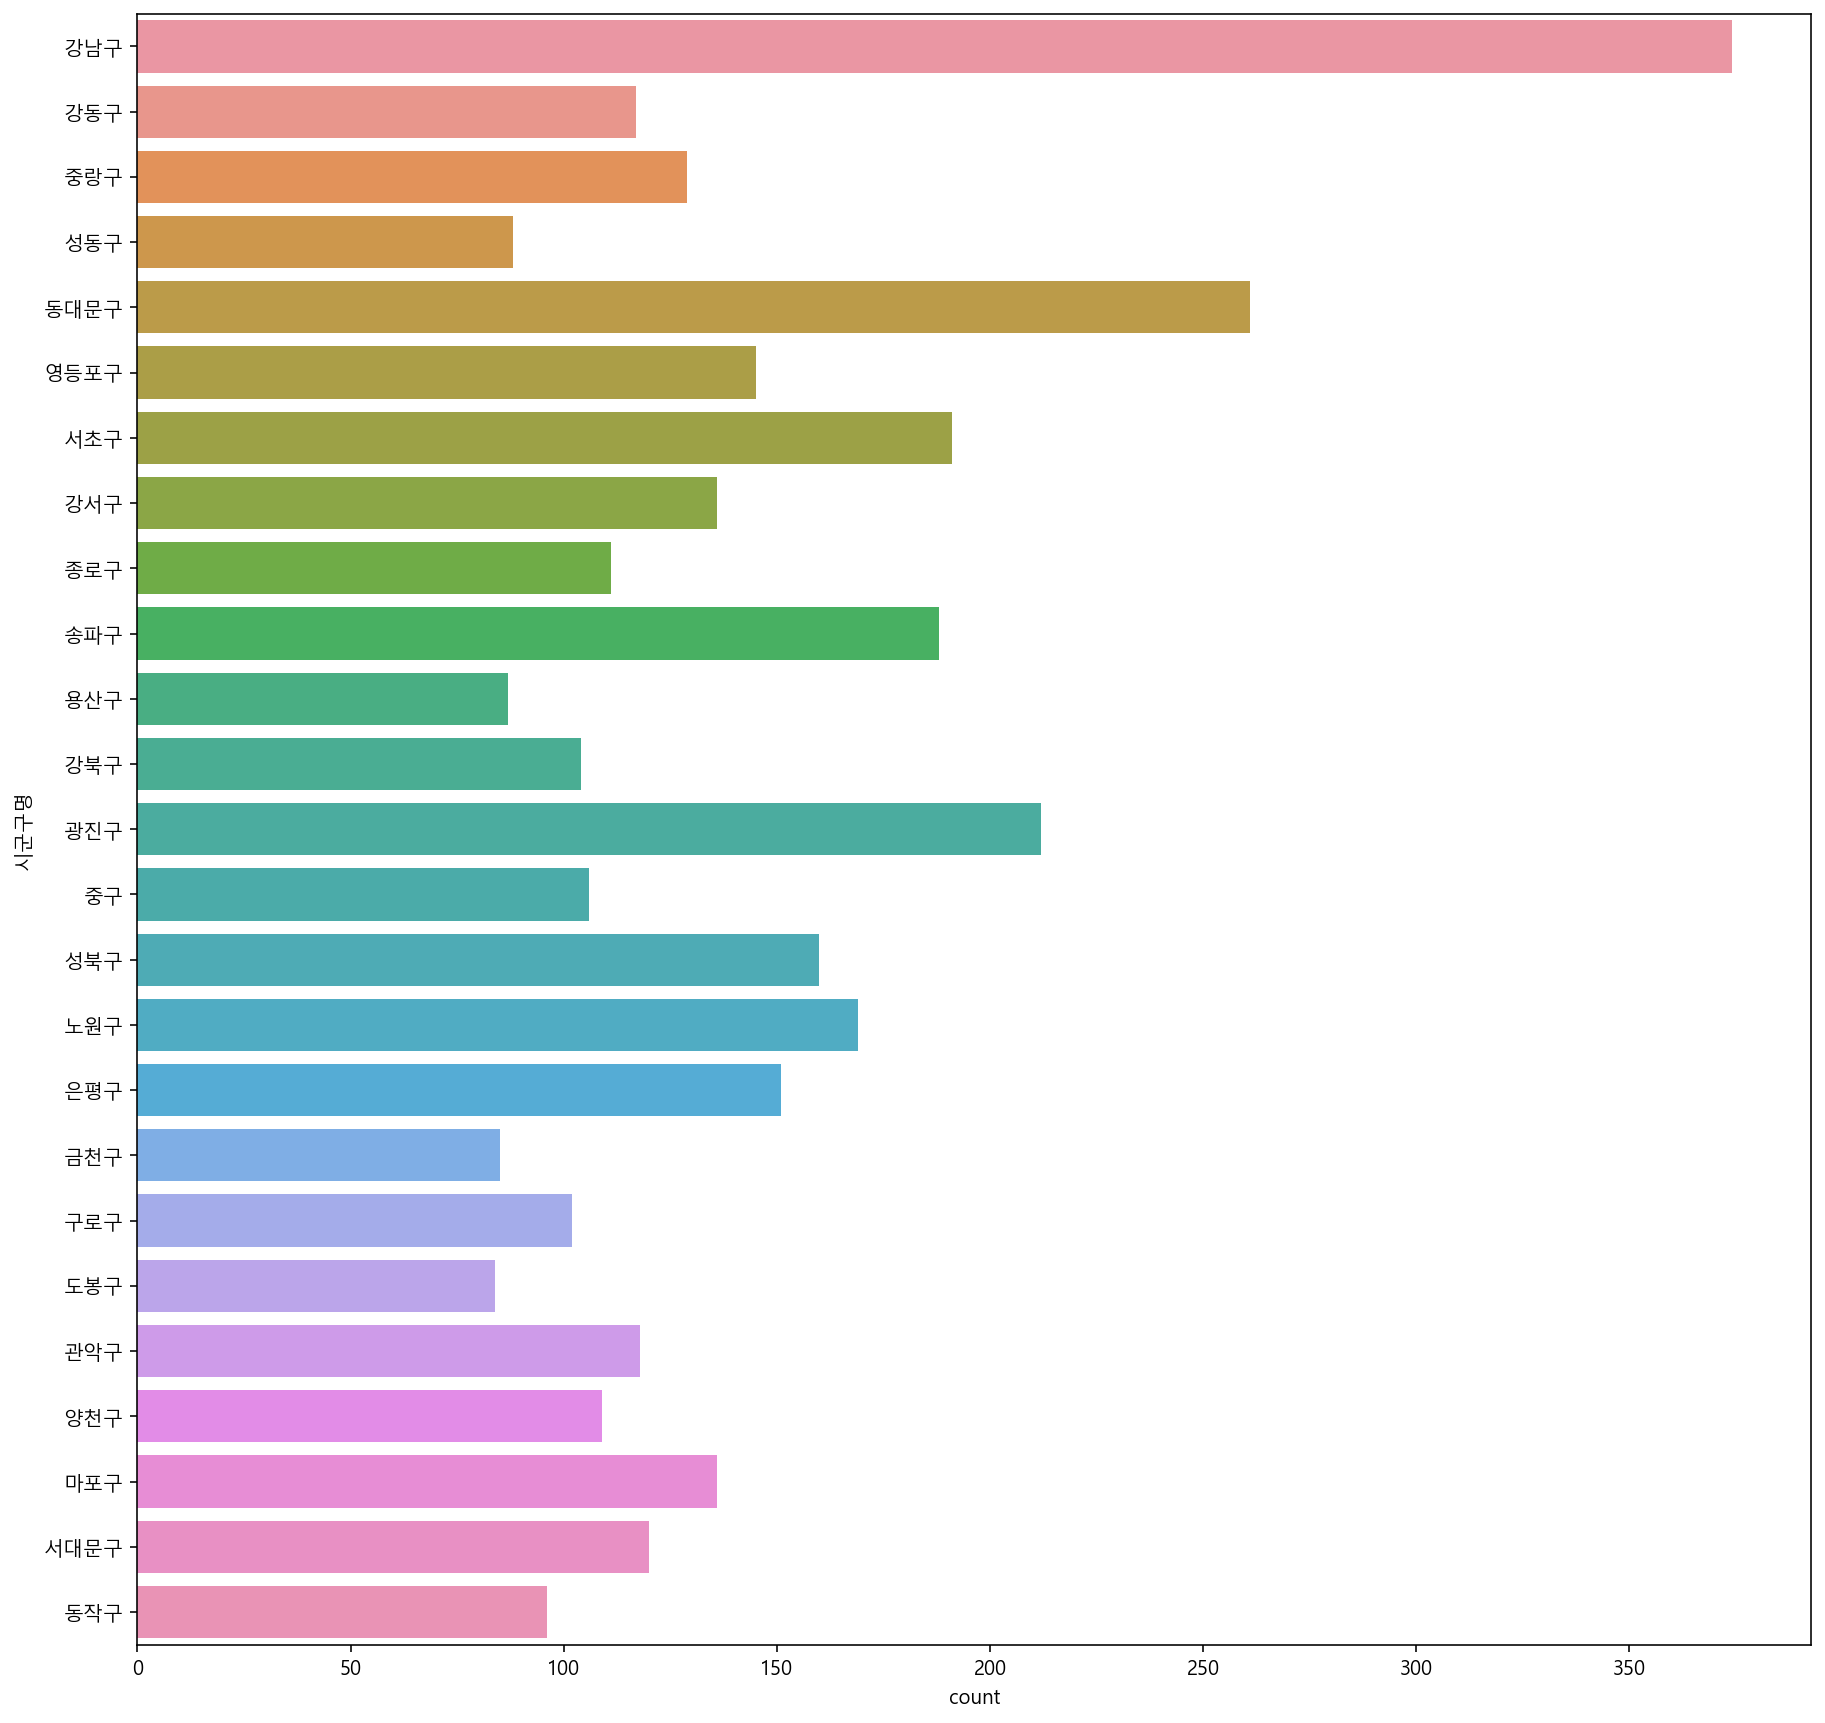

In [109]:
plt.figure(figsize=(15,15))
sns.countplot(data=df_seoul_drug, y='시군구명')

In [110]:
#'시도명'을 '서울특별시'으로 지정 
df_seoul = df[df['시도명']=='서울특별시'].copy()

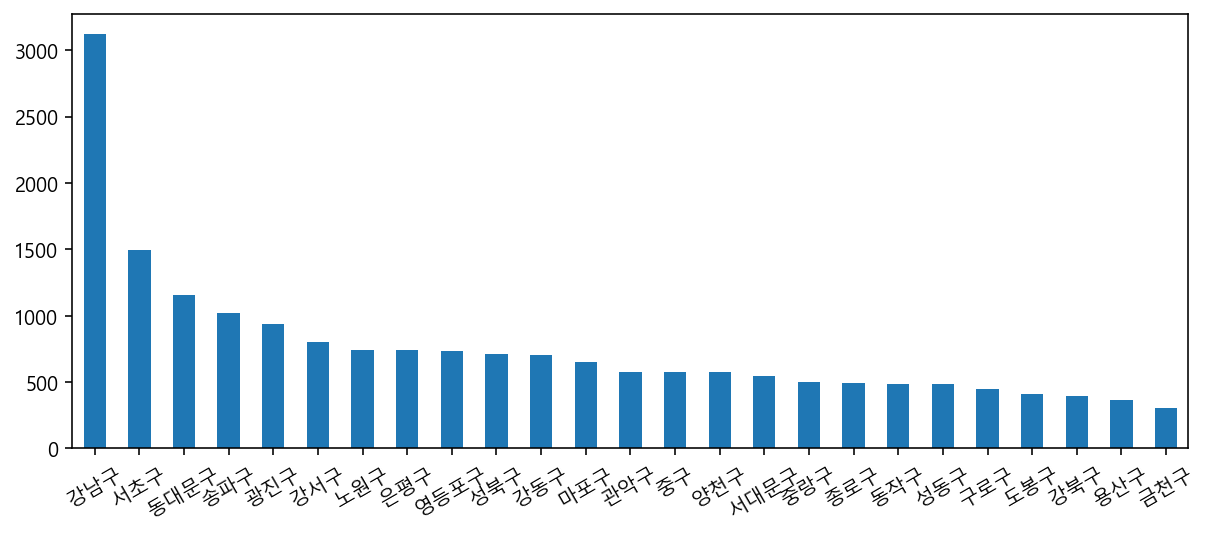

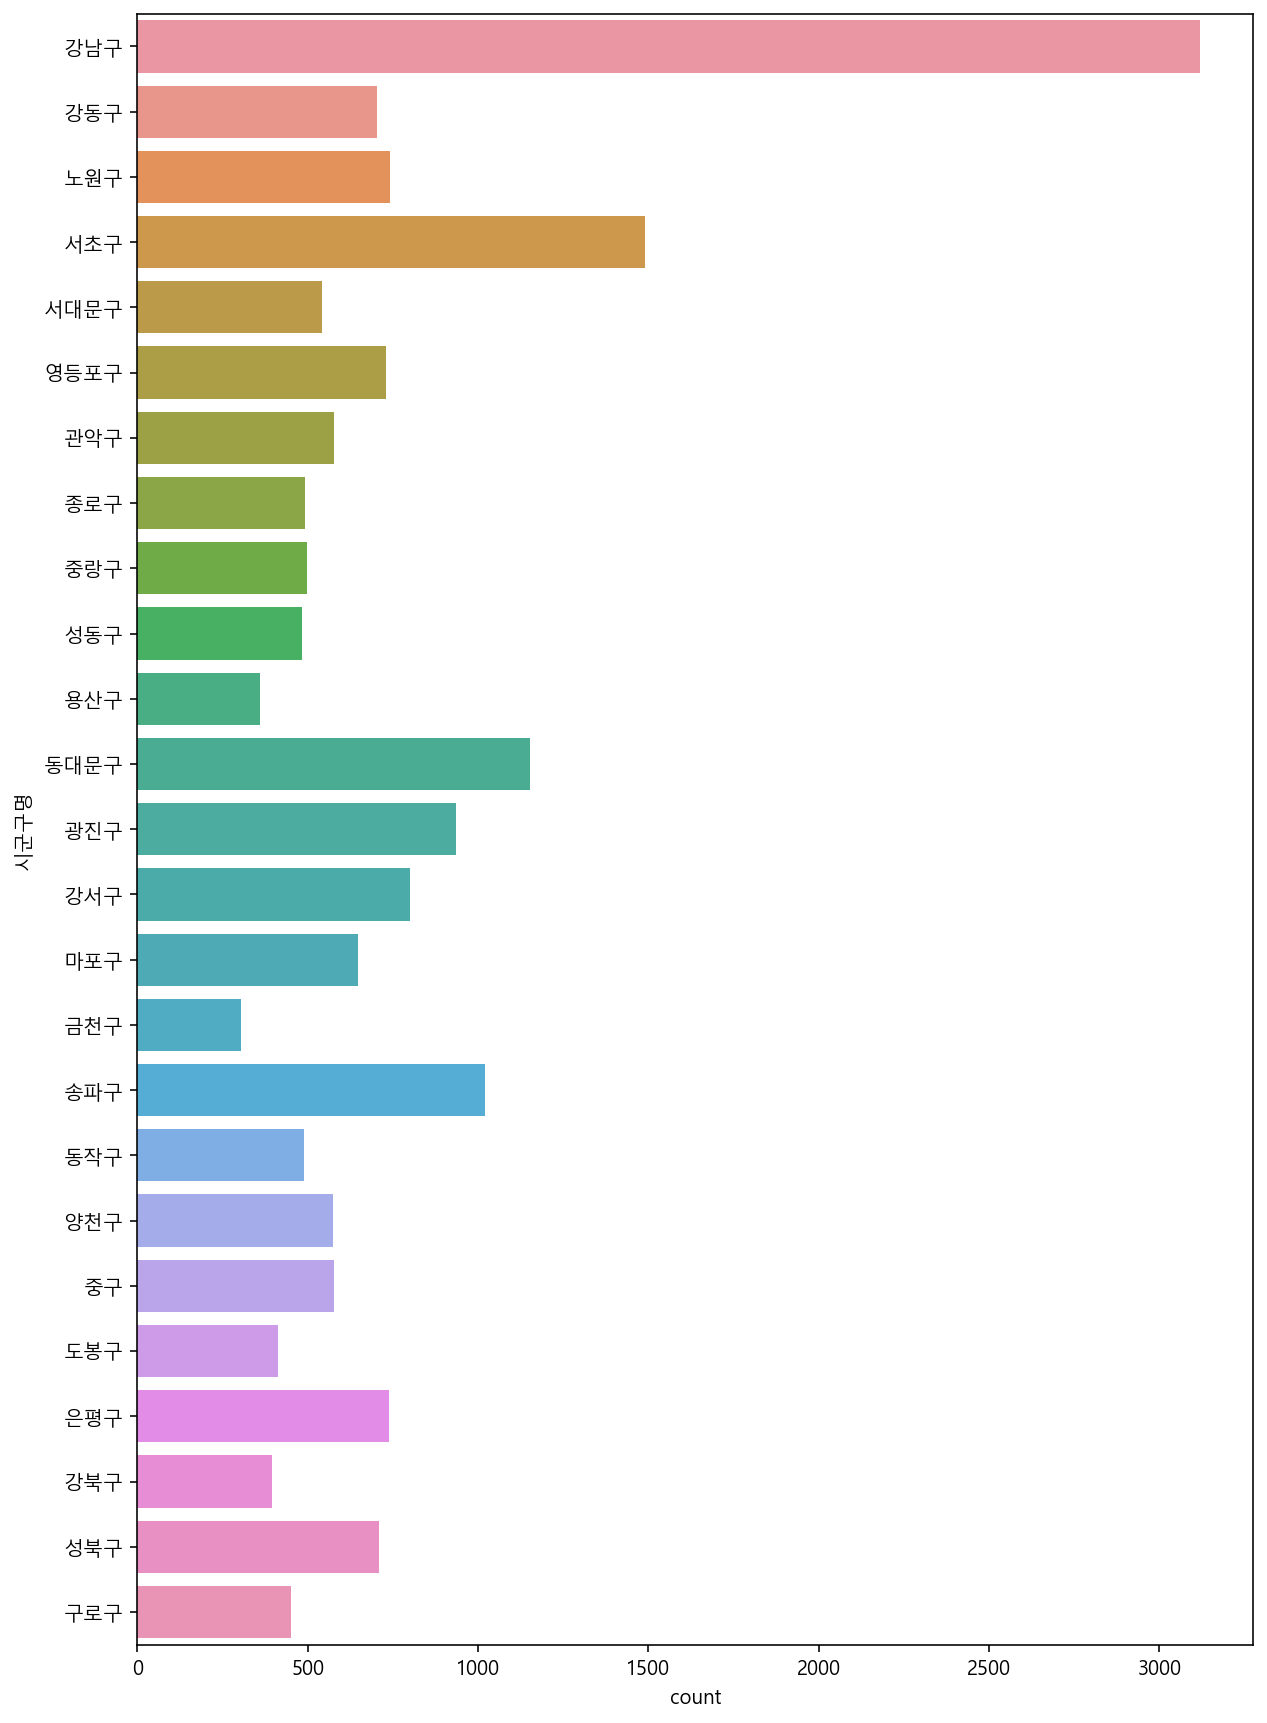

In [125]:
#'시군구명'으로 groupby하기 
df_seoul['시군구명'].value_counts()

### 다양한 시각화 방법 ###

#plot.bar로 시각화
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4), rot=30)

#seaborn으로 countplot 그리기

plt.figure(figsize=(10,15))
sns.countplot(data=df_seoul,y='시군구명')

### 위도, 경도

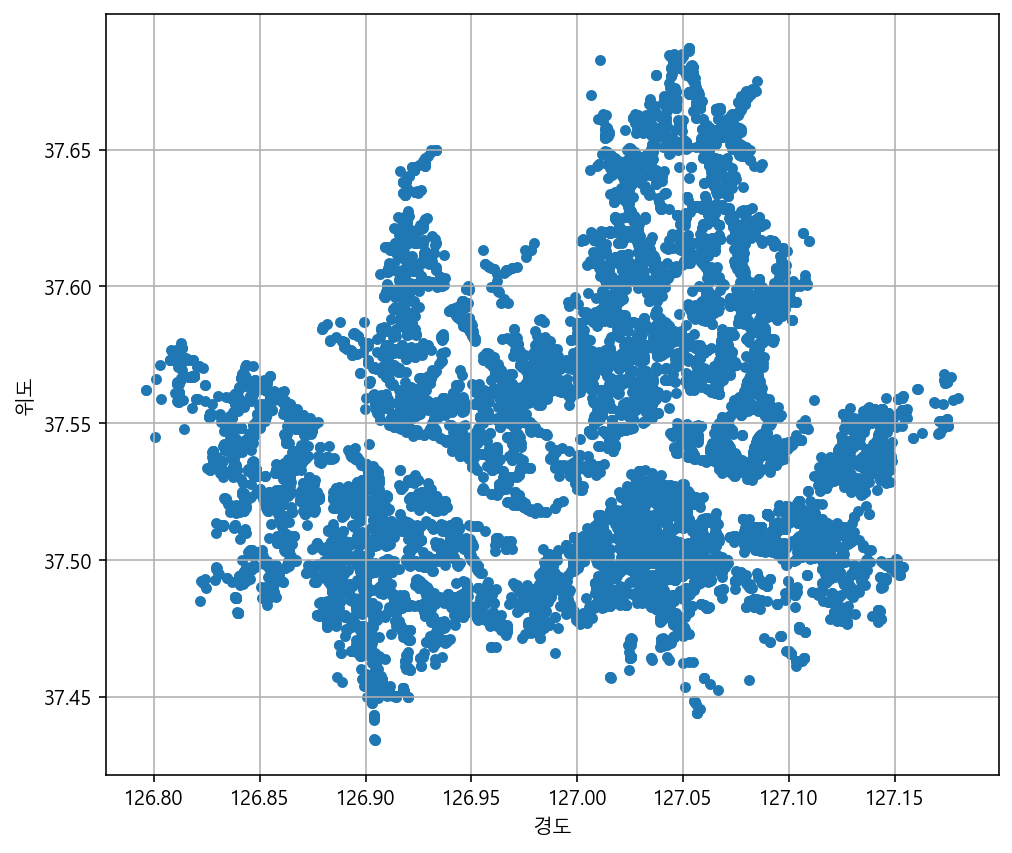

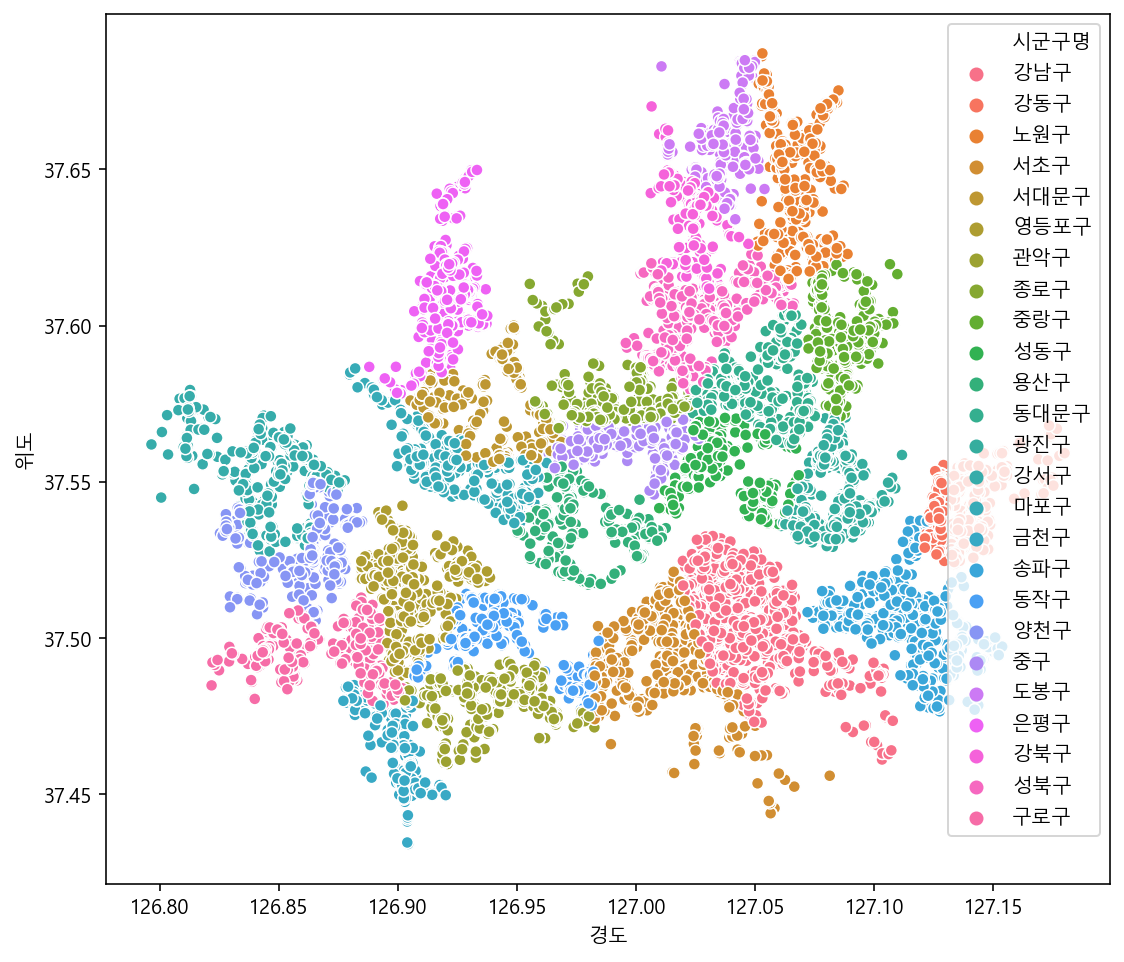

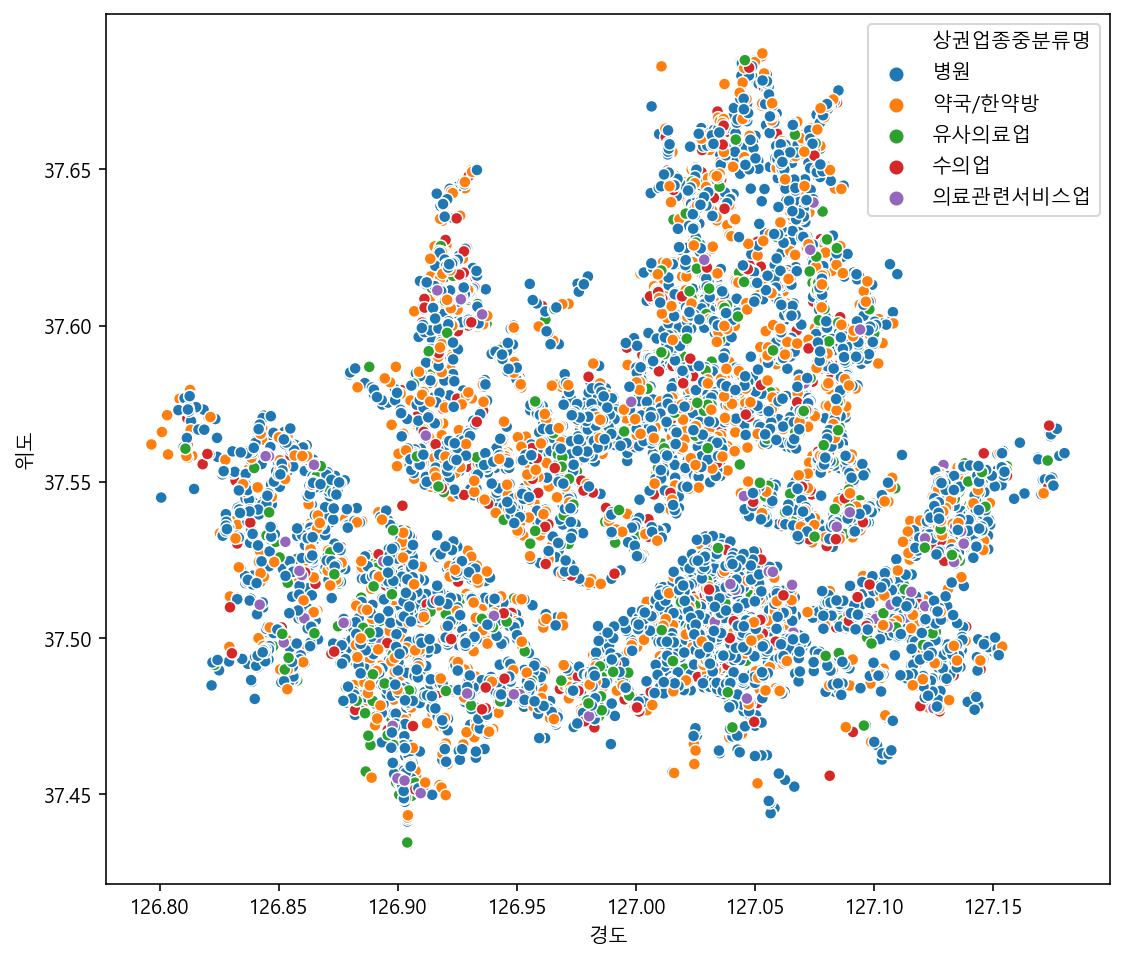

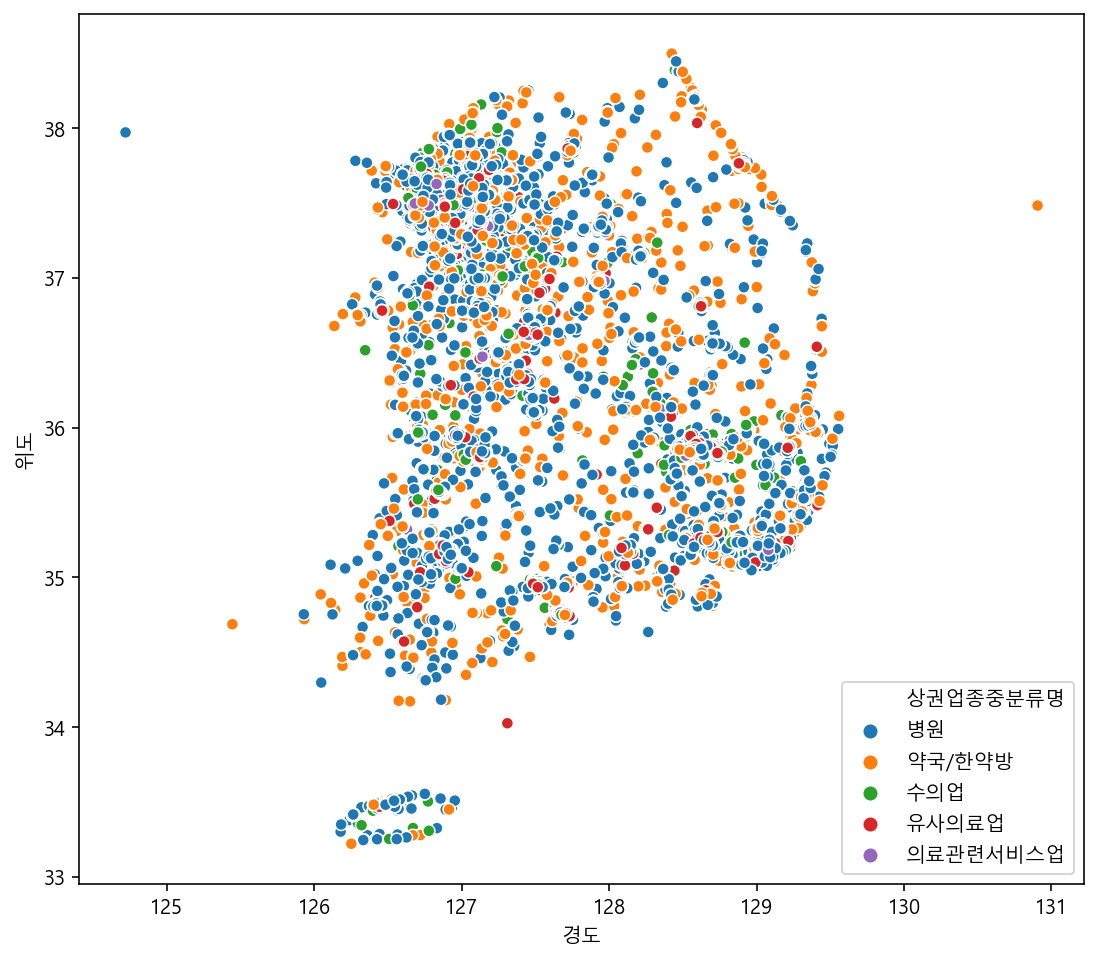

In [135]:
#pandas의 plot.scatter를 통해 경도, 위도 표시
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도', figsize=(8,7), grid=True)

#seaborn의 scatter을 통해 경도, 위도 표시
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul,x='경도',y='위도',hue='시군구명')

#seaborn의 scatterplot을 통해 서울 /'상권업종중분류명'을 기준으로 경도, 위도를 표시
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x='경도',y='위도',hue='상권업종중분류명')

#seaborn의 scatterplot을 통해 전국 / '상권업종중분류명'을 기준으로 경도, 위도를 표시
plt.figure(figsize=(9,8))
sns.scatterplot(data=df, x='경도',y='위도',hue='상권업종중분류명')

## Folium 으로 지도 활용하기

In [136]:
#아나콘다에서 folium을 사용하기 위해서 설치
#아나콘다 프롬프트 이용해서 설치
#conda install -c conda-forge folium
#지도 시각화를 위한 라이브러리

import folium

In [138]:
df_seoul_hospital = df[(df['상권업종소분류명']=='종합병원') 
                       & (df['시도명']=='서울특별시')].copy()

In [139]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균을 구하기
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

127.00850537565638

In [140]:
#위치 지정
folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()]
          , zoom_start=12)

In [146]:
map = folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()]
          , zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    address = df_seoul_hospital.loc[n, '도로명주소']
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n,'위도'], df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location
        , popup = popup
    ).add_to(map)
    
map